In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage , dendrogram

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
from scipy.stats import skew

In [6]:
print(skew(df[['CustomerID','Annual Income (k$)','Spending Score (1-100)']]))

[ 0.          0.31942368 -0.04686531]


In [7]:
Q1=np.percentile(df['Annual Income (k$)'],25)
Q3= np.percentile(df['Annual Income (k$)'],75)
IQR=Q3-Q1

In [8]:
lower_band = Q1 - 1.5*IQR
upper_band = Q3 + 1.5*IQR

In [10]:
outliers = df[(df['Annual Income (k$)']<lower_band)  |   (df['Annual Income (k$)']>upper_band)]

In [19]:
outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [21]:
df.loc[outliers.index , 'Annual Income (k$)']=np.nan

In [23]:
df=df.dropna()

<Axes: >

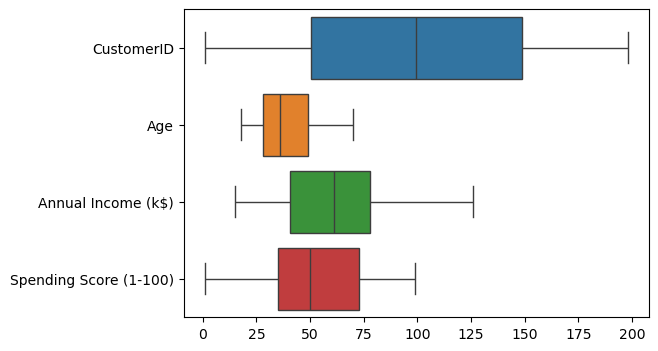

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(df , orient='h')

In [26]:
std=StandardScaler()

In [29]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [31]:
x=std.fit_transform(x)

In [33]:
linked = linkage(x, method='ward')

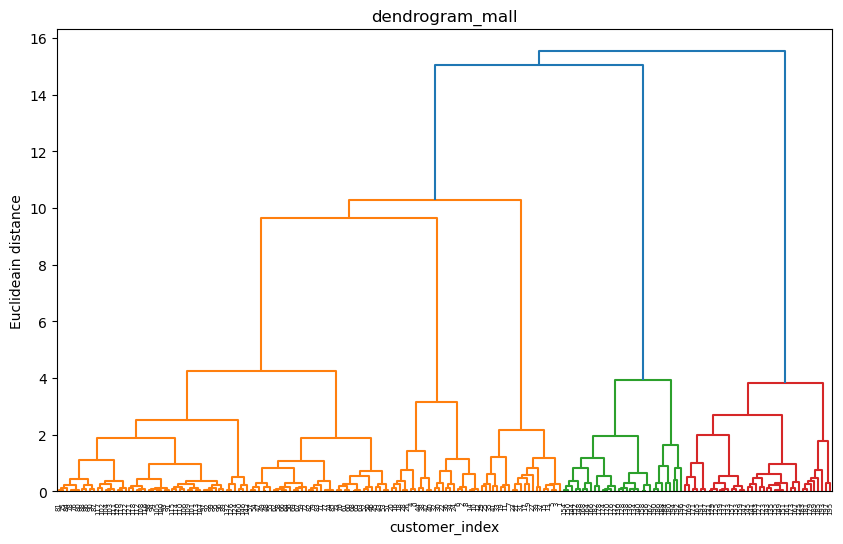

In [35]:
plt.figure(figsize=(10,6))
dendrogram(linked , orientation='top' , distance_sort='descending' , show_leaf_counts=True)
plt.title('dendrogram_mall')
plt.xlabel('customer_index')
plt.ylabel('Euclideain distance')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
model= AgglomerativeClustering(n_clusters=5 , linkage='ward')

In [39]:
model.fit(x)

AgglomerativeClustering(n_clusters=5)

In [45]:
cluster_label=model.fit_predict(x)

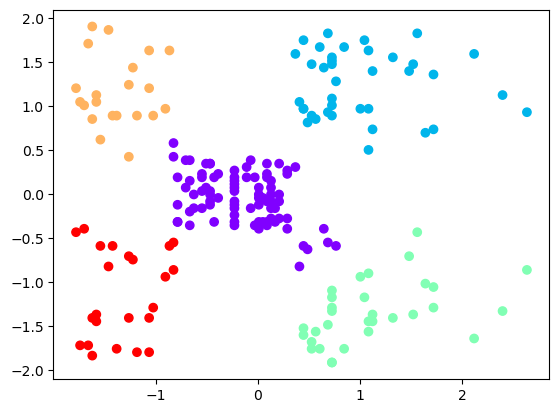

In [47]:
plt.scatter(x[:,0] , x[:,1] , c=cluster_label , cmap='rainbow')

In [49]:
score= silhouette_score(x , cluster_label )

In [51]:
score

0.558374157913064

In [69]:
s=[]
for k in range(2,11):
    model= AgglomerativeClustering(n_clusters=k , linkage='ward')
    model.fit(x)
    cluster_label=model.fit_predict(x)
    score= silhouette_score(x , cluster_label )
    s.append(score)
print(s)

[0.3822663636876075, 0.4593987242550018, 0.49314182604801104, 0.558374157913064, 0.45001541939307077, 0.44394300781070417, 0.4300974700302882, 0.4358082740940405, 0.43527616225320404]


In [78]:
best_k=5
model= AgglomerativeClustering(n_clusters=best_k, linkage='ward')
model.fit(x)
cluster_label=model.fit_predict(x)
df['Cluster']=cluster_label

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15.0,39,4
1,2,Male,21,15.0,81,3
2,3,Female,20,16.0,6,4
3,4,Female,23,16.0,77,3
4,5,Female,31,17.0,40,4


In [82]:
df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.811765,49.129412
1,85.210526,82.105263
2,87.870968,15.516129
3,25.095238,80.047619
4,26.304348,20.913043
